<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/SLR_LI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats as stats

In [6]:
df = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test_QkPvNLx.csv')
print(df.shape)
print(test.shape)

(512087, 11)
(36000, 9)


In [7]:
rtr=  pd.read_csv('/content/train.csv')

In [12]:
df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [13]:
test.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [51]:
df.isna().sum()

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

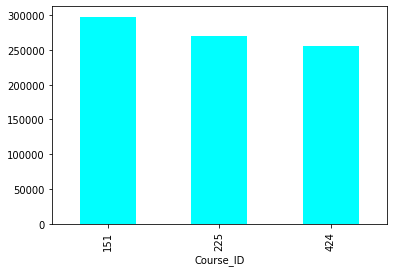

In [16]:
# which is the most sold course?
df['Sales'].groupby(df['Course_ID']).sum().sort_values(ascending=False)[:3].plot(kind= 'bar', color='cyan')

In [17]:
# Course number 151 is the most sold course

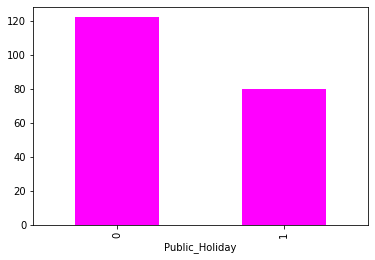

In [18]:
# Does Holiday affect sales?

df['Sales'].groupby(df['Public_Holiday']).mean().plot(kind='bar',color= 'magenta')

In [19]:
# Seems like people buy more on an average on non holidays

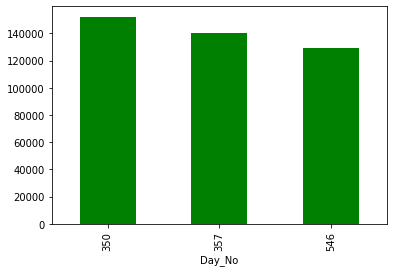

In [20]:
# which day number made the most number of sales

df['Sales'].groupby(df['Day_No']).sum().sort_values(ascending=False)[:3].plot(kind= 'bar', color= 'green')

## Day number 350 made the most sale, followed by day number 357, followed by 546

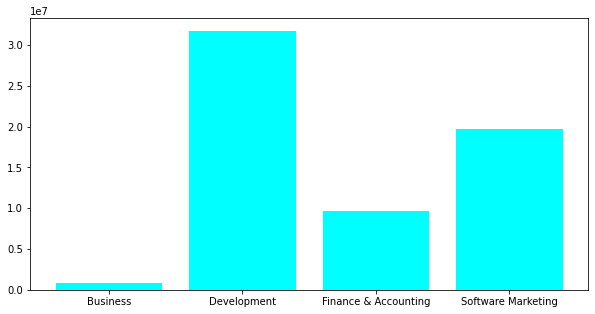

In [21]:
plt.figure(figsize=(10,5))
plt.bar(df['Sales'].groupby(df['Course_Domain']).sum().index, df['Sales'].groupby(df['Course_Domain']).sum().values, color = 'cyan')
plt.show()


In [22]:
# Development genre of books made the most sales.

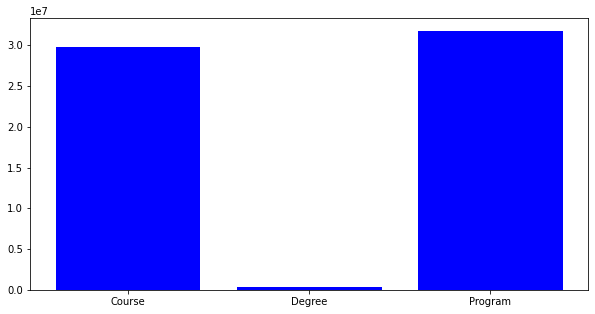

In [23]:

plt.figure(figsize=(10,5))
plt.bar(df['Sales'].groupby(df['Course_Type']).sum().index, df['Sales'].groupby(df['Course_Type']).sum().values, color = 'blue')
plt.show()


In [24]:
# Program type courses made the most sale

In [25]:
df['Course_Type'].unique()

array(['Course', 'Program', 'Degree'], dtype=object)

In [26]:
df.dtypes

ID                      int64
Day_No                  int64
Course_ID               int64
Course_Domain          object
Course_Type            object
Short_Promotion         int64
Public_Holiday          int64
Long_Promotion          int64
User_Traffic            int64
Competition_Metric    float64
Sales                   int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


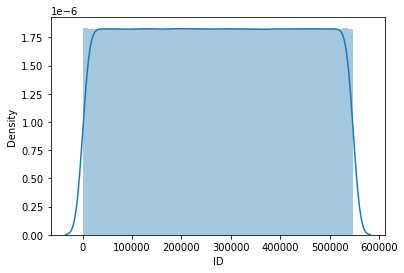

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


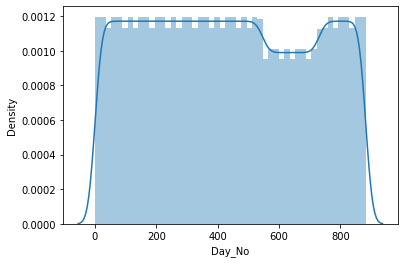

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


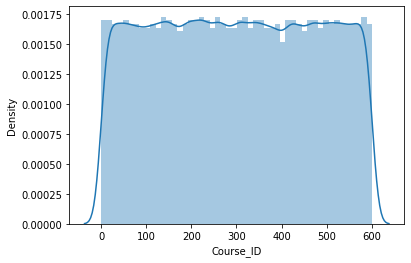

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


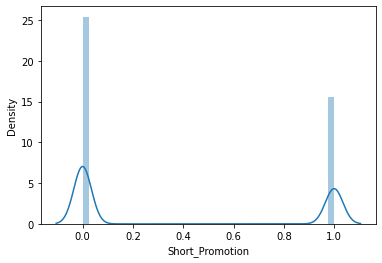

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


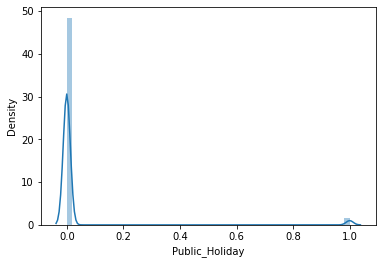

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


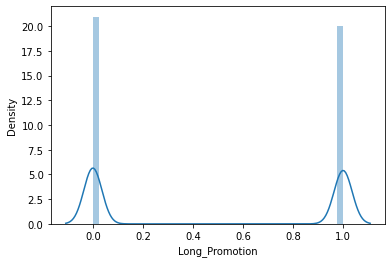

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


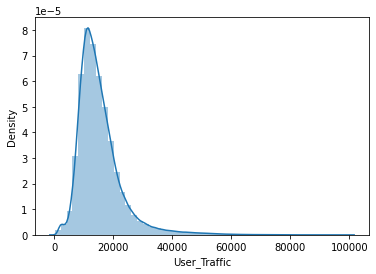

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


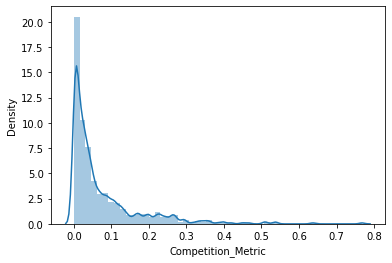

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


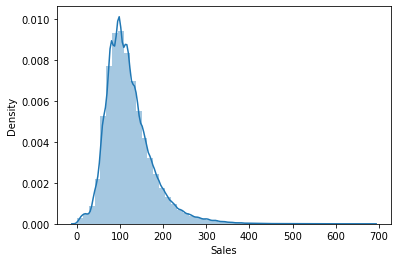

In [27]:
# Lets check distributions

for i in df.select_dtypes(include='number'):
  sns.distplot(df[i])
  plt.show()

In [28]:
# Skewness and kurtosis:

for i in df.select_dtypes(include='number'):
  print(i, 'skew', df[i].skew())
  print(i, 'kurt', df[i].kurt())
  print('\n')

ID skew 0.00016316945461488104
ID kurt -1.1999794466036613


Day_No skew 0.058605317253384005
Day_No kurt -1.1960173884622114


Course_ID skew 0.0025342903969726312
Course_ID kurt -1.199723268471161


Short_Promotion skew 0.49339156423960234
Short_Promotion kurt -1.75657162480802


Public_Holiday skew 5.35155917831127
Public_Holiday kurt 26.63928968120183


Long_Promotion skew 0.044136273318374185
Long_Promotion kurt -1.998059793003124


User_Traffic skew 2.3078205092666377
User_Traffic kurt 9.417347862839343


Competition_Metric skew 2.5779639535777976
Competition_Metric kurt 8.780034230123329


Sales skew 1.3747711028692273
Sales kurt 3.609500648997228




In [29]:
# Competition_Metric - Right skewed 
# Sales-               Right skewed 
# User_Traffic-        Right skewed

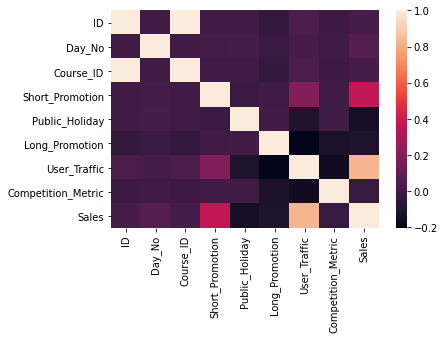

In [30]:
sns.heatmap(df.corr())

In [31]:
df.corr()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
ID,1.000000,0.001050,0.999996,-0.000002,0.001274,-0.039572,0.033604,-0.007432,0.017038
Day_No,0.001050,1.000000,-0.000508,0.014648,0.019112,-0.020206,0.021511,0.003228,0.060013
Course_ID,0.999996,-0.000508,1.000000,-0.000024,0.001241,-0.039608,0.033520,-0.007386,0.016895
Short_Promotion,-0.000002,0.014648,-0.000024,1.000000,-0.018769,-0.001147,0.198785,0.000184,0.367761
Public_Holiday,0.001274,0.019112,0.001241,-0.018769,1.000000,0.008319,-0.108304,-0.000492,-0.135052
Long_Promotion,-0.039572,-0.020206,-0.039608,-0.001147,0.008319,1.000000,-0.204289,-0.119383,-0.109454
User_Traffic,0.033604,0.021511,0.033520,0.198785,-0.108304,-0.204289,1.000000,-0.148775,0.829742
Competition_Metric,-0.007432,0.003228,-0.007386,0.000184,-0.000492,-0.119383,-0.148775,1.000000,-0.022085
Sales,0.017038,0.060013,0.016895,0.367761,-0.135052,-0.109454,0.829742,-0.022085,1.000000


## hypothesis testing

In [32]:
df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [8]:
# Lets fit a base model and see

# Lets dummy encode first

df= pd.get_dummies(data= df, columns=['Course_Domain', 'Course_Type'], drop_first=True)
df.head()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,1,1,1,0,1,1,11004,0.007,81,1,0,0,0,0
1,2,2,1,0,0,1,13650,0.007,79,1,0,0,0,0
2,3,3,1,0,0,1,11655,0.007,75,1,0,0,0,0
3,4,4,1,0,0,1,12054,0.007,80,1,0,0,0,0
4,5,5,1,0,0,1,6804,0.007,41,1,0,0,0,0


In [9]:
dr= df.iloc[:, 1:]

In [10]:
dt= df
dt.drop({'Sales'},axis=1, inplace=True)

In [11]:
y = dr['Sales']

In [12]:
dr.isna().sum()

Day_No                                   0
Course_ID                                0
Short_Promotion                          0
Public_Holiday                           0
Long_Promotion                           0
User_Traffic                             0
Competition_Metric                    1764
Sales                                    0
Course_Domain_Development                0
Course_Domain_Finance & Accounting       0
Course_Domain_Software Marketing         0
Course_Type_Degree                       0
Course_Type_Program                      0
dtype: int64

In [ ]:
dt = dr

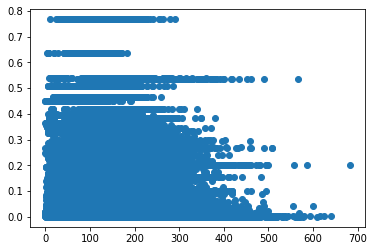

In [54]:
# scatter between Competition_Metric and Sales

plt.scatter(df['Sales'], df['Competition_Metric'])

In [57]:
df['Sales'].corr(df['Competition_Metric'])

-0.02208526501361204

In [13]:
# we can drop competetion metrics column

dt.drop({'Competition_Metric'}, axis=1, inplace=True)

In [16]:
dt.shape

(512087, 12)

In [17]:
y = rtr['Sales']
y.shape

(512087,)

In [18]:
# lets build a base model and see.
import statsmodels.api as sm
xc= sm.add_constant(dt)
model = sm.OLS(y, xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 2.019e+05
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:04:34   Log-Likelihood:            -2.3257e+06
No. Observations:              512087   AIC:                         4.651e+06
Df Residuals:                  512074   BIC:                         4.652e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [41]:
# since id value is not further increasing our r square score- we can keep it. 

from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(xc, y, random_state= 42)

# Transforming the skewed features

In [ ]:
# Competition_Metric - Right skewed 
# Sales-               Right skewed 
# User_Traffic-        Right skewed

In [42]:
# training accuracy 
import statsmodels.api as sm
model1 = sm.OLS(ytr, xtr).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                 1.513e+05
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:31:04   Log-Likelihood:            -1.7439e+06
No. Observations:              384065   AIC:                         3.488e+06
Df Residuals:                  384052   BIC:                         3.488e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [ ]:
# Transformation is only bringing down the accuracy of both. so we choose not to transform

In [43]:
from sklearn.metrics import r2_score, mean_squared_error
ypre = model1.predict(xts)
ytrain_acc = model1.predict(xtr)
print(' TEST -- {} is r_square score, {} is rmse'.format(r2_score(yts, ypre), np.sqrt(mean_squared_error(yts, ypre))))
print(' TRain -- {} is r_square score, {} is rmse'.format(r2_score(ytr, ytrain_acc), np.sqrt(mean_squared_error(ytr, ytrain_acc))))

 TEST -- 0.8256577446133548 is r_square score, 22.776566892049203 is rmse
 TRain -- 0.8254424465927608 is r_square score, 22.68259442951871 is rmse


In [ ]:
# assumptions

# No Autocorrelation among residuals

## The DW score we got is almost 2- which is a good sign. That means residuals not overly autocorrelated

In [51]:
# No perfect Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

ar = [vif(xtr.values, i) for i in range(xtr.shape[1])]
fr= pd.DataFrame(ar, index=xtr.columns)
fr

,0
const,229.127130
Day_No,1.001285
Course_ID,1.014956
Short_Promotion,1.055002
Public_Holiday,1.015762
Long_Promotion,1.065999
User_Traffic,1.408837
Course_Domain_Development,51.539318
Course_Domain_Finance & Accounting,26.954350
Course_Domain_Software Marketing,46.665624


In [68]:
xtr.head()

,const,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
106453,1.0,766,125,1,0,1,7476,0,0,1,0,0
123784,1.0,825,145,0,0,1,9576,0,0,1,0,0
140483,1.0,252,165,1,0,1,18816,1,0,0,0,0
266549,1.0,528,312,0,0,1,10101,1,0,0,0,0
456684,1.0,272,536,0,0,1,10017,1,0,0,0,0


In [49]:
# As expected ID has no big role to play, so we can remove it, 

train_ID = xtr['ID']
xtr.drop({'ID'}, axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
ar = [vif(xtr.values, i) for i in range(xtr.shape[1])]
fr= pd.DataFrame(ar, index=xtr.columns)
fr

,0
const,229.127130
Day_No,1.001285
Course_ID,1.014956
Short_Promotion,1.055002
Public_Holiday,1.015762
Long_Promotion,1.065999
User_Traffic,1.408837
Course_Domain_Development,51.539318
Course_Domain_Finance & Accounting,26.954350
Course_Domain_Software Marketing,46.665624


In [ ]:
# Removing that, even the course id VIF came down.

In [ ]:
# lets do a hypothesis testing that Course_Domain actually affects sales. (Anova Test)

In [ ]:
df.head()

In [ ]:
# we are trying to prove that There are no variations in any of the course domains. they all contribute equally. (Anova)

# H0 = MU1 = MU2 = MU3 = MU4

# Ha = they are not the same

In [85]:
from scipy.stats import f_oneway

In [86]:
Dev = rtr.loc[rtr['Course_Domain'] == 'Development']['Sales']
soft = rtr.loc[rtr['Course_Domain'] == 'Software Marketing']['Sales']
fin =  rtr.loc[rtr['Course_Domain'] == 'Finance & Accounting']['Sales']
busi = rtr.loc[rtr['Course_Domain'] == 'Business']['Sales']

In [87]:
f_oneway(Dev.values, soft.values, fin.values, busi.values)

F_onewayResult(statistic=2412.4625941656946, pvalue=0.0)

In [ ]:
# We reject the null hypothesis. Genre has significantly different varainces.

In [54]:
# lets run a Lasso and get the most contributing variables.

from sklearn.linear_model import Lasso
las= Lasso(alpha=0.5, max_iter=100000).fit(xtr, ytr)

In [55]:
dic = {i:abs(k) for i,k in zip(xtr.columns, las.coef_)}

In [56]:
dic

{'Course_Domain_Development': 0.0,
 'Course_Domain_Finance & Accounting': 0.0,
 'Course_Domain_Software Marketing': 18.942705082741053,
 'Course_ID': 0.0036572437615532494,
 'Course_Type_Degree': 31.540663521025806,
 'Course_Type_Program': 7.008549838056314,
 'Day_No': 0.008544799014470998,
 'Long_Promotion': 2.022796671722471,
 'Public_Holiday': 0.0,
 'Short_Promotion': 20.062169478471176,
 'User_Traffic': 0.005985378705280797,
 'const': 0.0}

In [57]:
sorted(dic, key=dic.get, reverse=True)[:9]

['Course_Type_Degree',
 'Short_Promotion',
 'Course_Domain_Software Marketing',
 'Course_Type_Program',
 'Long_Promotion',
 'Day_No',
 'User_Traffic',
 'Course_ID',
 'const']

In [30]:
# lets see how the RFE ranks the feature. 

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
ar = LinearRegression()
rfe_ = RFE(ar, n_features_to_select = 9)
rfe_.fit(xtr, ytr)

al = pd.DataFrame(rfe_.ranking_, index=xtr.columns, columns=['ranks'])

In [31]:
al

,ranks
const,4
Day_No,1
Course_ID,3
Short_Promotion,1
Public_Holiday,1
Long_Promotion,1
User_Traffic,2
Course_Domain_Development,1
Course_Domain_Finance & Accounting,1
Course_Domain_Software Marketing,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


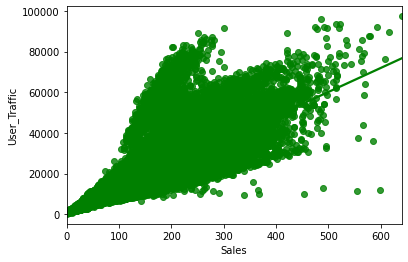

In [34]:
sns.regplot(ytr, xtr['User_Traffic'], color='green')

In [ ]:
# from what looks like, User traffic is affecting the sales positively 
# But intrestingly RFE is showing otherwise. 

In [58]:
# lets build model with top 9 features.
re = sorted(dic, key=dic.get, reverse=True)[:9]

In [59]:
import statsmodels.api as sm
model2 = sm.OLS(ytr, xtr[re]).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 2.142e+05
Date:                Tue, 02 Feb 2021   Prob (F-statistic):               0.00
Time:                        04:35:04   Log-Likelihood:            -1.7531e+06
No. Observations:              384065   AIC:                         3.506e+06
Df Residuals:                  384056   BIC:                         3.506e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Course_T

In [60]:
from sklearn.metrics import r2_score, mean_squared_error
ypre = model2.predict(xts[re])
ytrain_acc = model2.predict(xtr[re])
print(' TEST -- {} is r_square score, {} is rmse'.format(r2_score(yts, ypre), np.sqrt(mean_squared_error(yts, ypre))))
print(' TRain -- {} is r_square score, {} is rmse'.format(r2_score(ytr, ytrain_acc), np.sqrt(mean_squared_error(ytr, ytrain_acc))))

 TEST -- 0.8173814982010408 is r_square score, 23.31091502897826 is rmse
 TRain -- 0.8168817565173538 is r_square score, 23.232139743657804 is rmse


In [61]:
# almost same score in test and train with only 9 most important features.